<a href="https://colab.research.google.com/github/matheussato/data-science-study/blob/main/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
dados = pd.read_csv('aluguel.csv',sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Caracteristicas gerais do dataset

In [149]:
dados.shape

(32960, 9)

In [150]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [151]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [152]:
dados.describe()


,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


## Valor Médio de aluguel por  tipo de imovel



In [153]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [154]:
media = dados.groupby("Tipo")[['Valor']].mean().sort_values('Valor')
media

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


<Axes: ylabel='Tipo'>

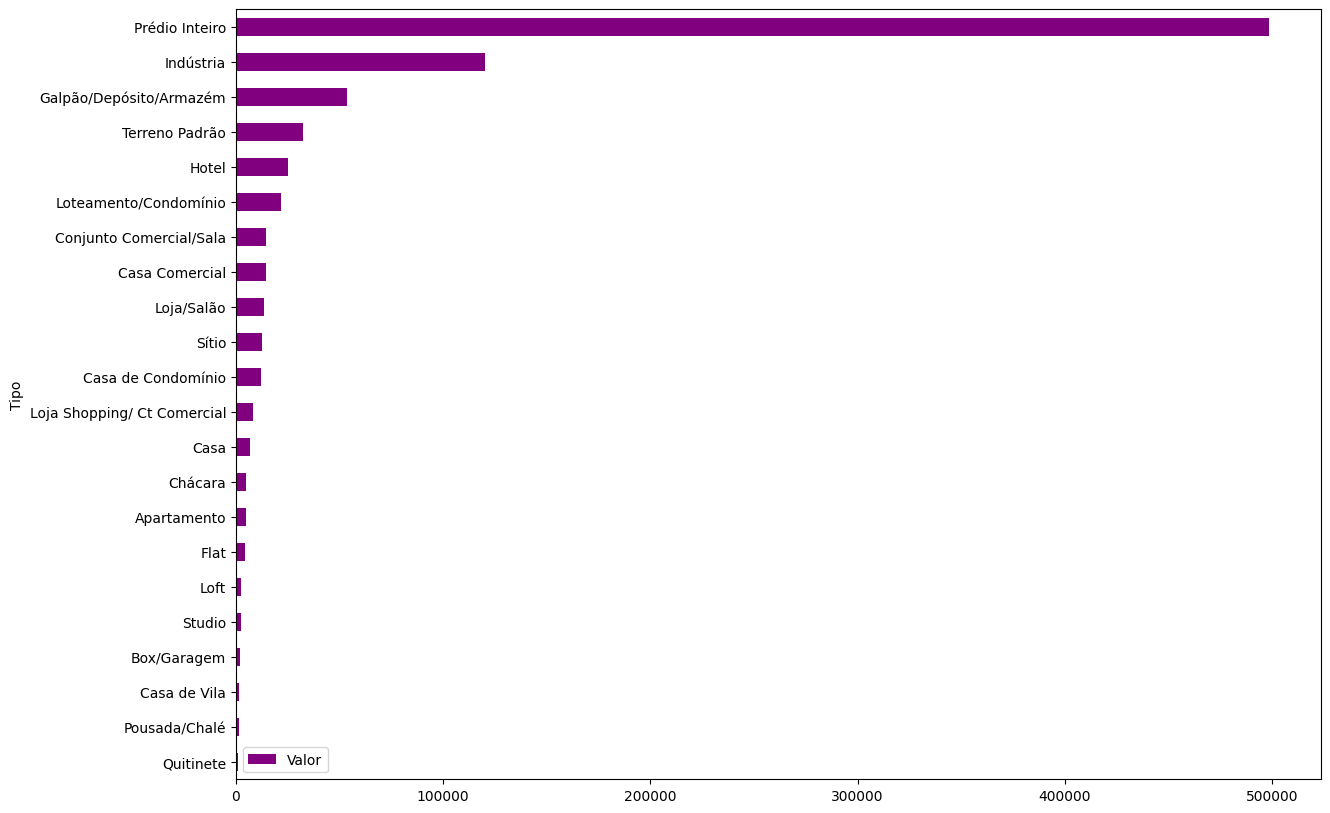

In [155]:
media.plot(kind='barh', figsize=(14,10),color='purple')

## Removendo os imóveis comerciais

In [156]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [157]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [158]:
dados.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [159]:
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [160]:
df = dados.query('@imoveis_comerciais not in Tipo')
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

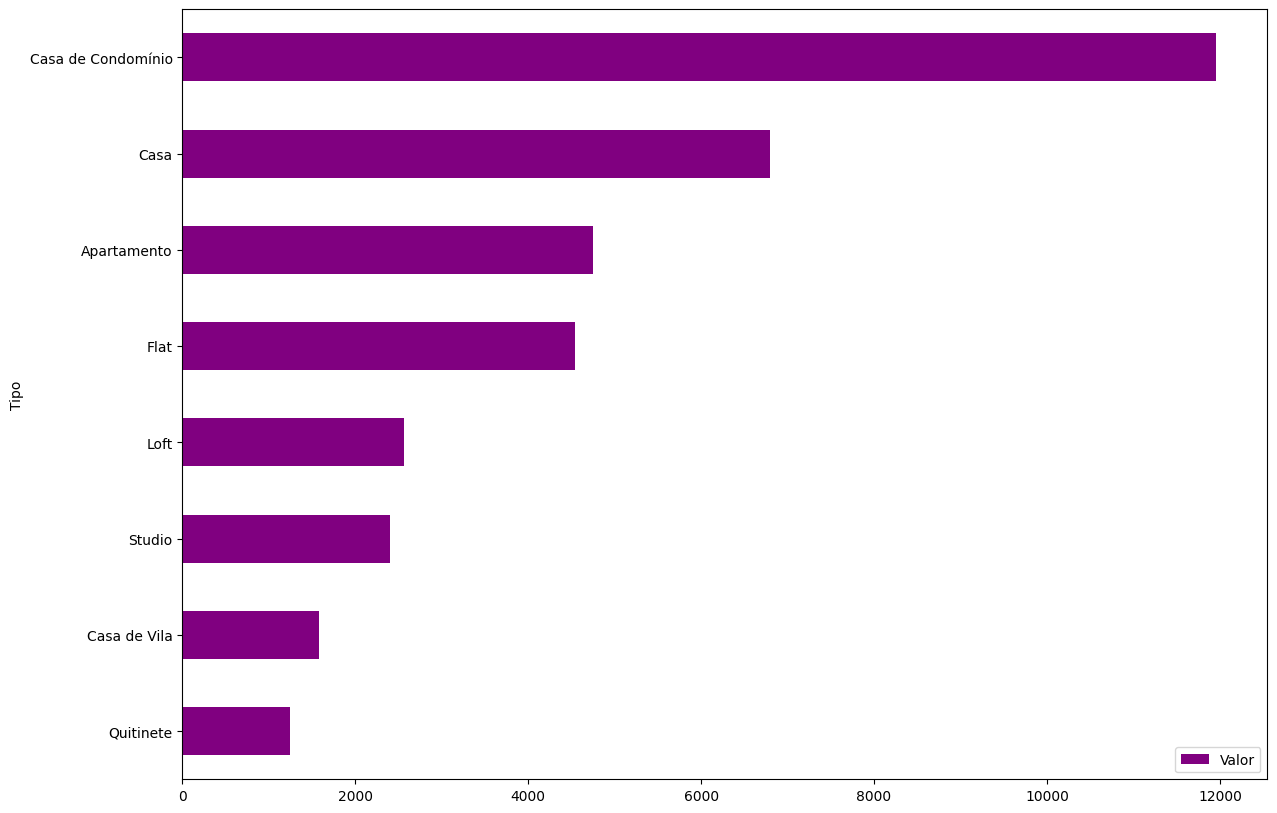

In [161]:
media2 = df.groupby("Tipo")[['Valor']].mean().sort_values('Valor')
media2.plot(kind='barh', figsize=(14,10),color='purple')

## Qual o percentual de cada tipo de imóvel na base de dados

In [162]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')
df_percentual_tipo

,Tipo
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: xlabel='Tipos', ylabel='Percentual'>

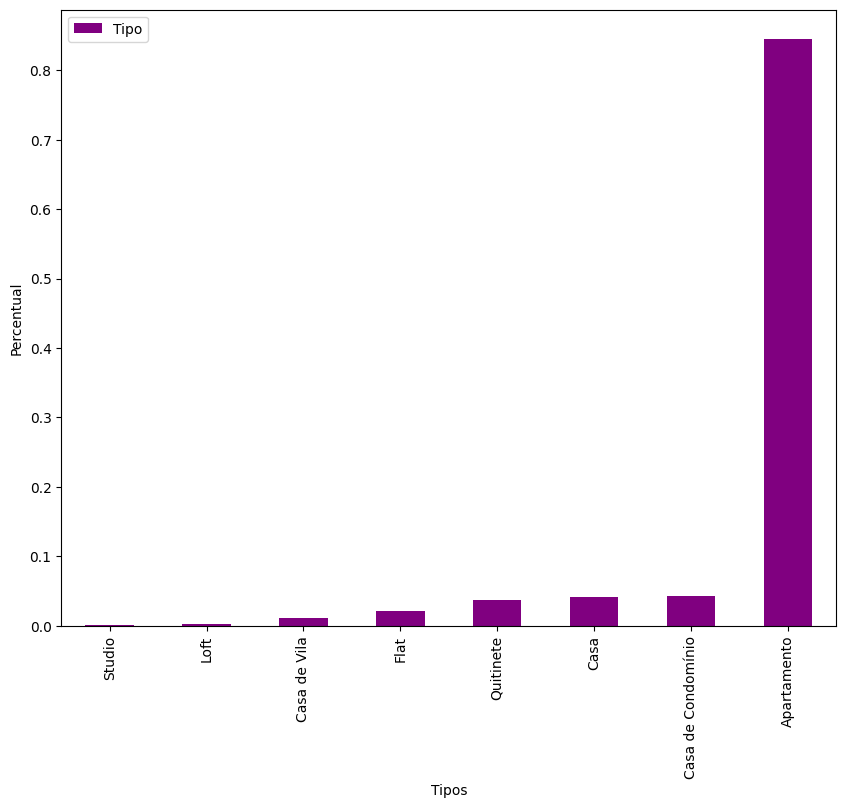

In [163]:
df_percentual_tipo.plot(kind='bar', figsize=(10,8),color='purple',xlabel='Tipos',ylabel='Percentual')

## Escolhendo só tipo==apartamento

In [164]:
df = df.query('Tipo == "Apartamento"')
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Tratando os dados

In [165]:
df.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [166]:
df.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [167]:
df = df.fillna(0)
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [168]:
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [169]:
registros_para_remover= df.query('Valor == 0 | Condominio == 0').index
registros_para_remover

Int64Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,
              292,
            ...
            32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708,
            32809],
           dtype='int64', length=752)

In [170]:
df.drop(registros_para_remover, axis=0, inplace=True)
# 0 -> remover linhas
# 1 -> remover colunas
#inplace = True -> muda definitivamente o dataframe

In [171]:
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [172]:
df.Tipo.unique()
df.drop('Tipo', axis=1,inplace=True)


In [173]:
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


### Apartamentos que possuem 1 quarto e aluguel menor que 1200

In [174]:
filtro1= df['Quartos'] == 1
df[filtro1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [175]:
filtro2 = df['Valor'] < 1200
df[filtro2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,0.0
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [176]:
filtro_final = (filtro1) & (filtro2)
df[filtro_final]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


##Apartamentos que possuem menos de 2 quartos, aluguel menor que 3000 e area maior que 70

In [177]:
selecao = (df['Quartos'] < 2) & (df['Valor'] < 3000) & (df['Area'] > 70)
df2= df[selecao]
df

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Méier,2,0,0,70,900.0,490.0,48.0
32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


##Salvando os dados

In [178]:
df.to_csv('dados_apartamentos.csv',index=False)

In [179]:
dados = pd.read_csv('dados_apartamentos.csv')
dados

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Criando Colunas Novas

In [180]:
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0
...,...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0,1550.0
18776,Méier,2,0,0,70,900.0,490.0,48.0,1390.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0


In [181]:
dados['Valor_por_ano'] = (dados['Valor'] * 12) + dados['IPTU']
dados


,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,9620.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,9600.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,15617.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,18074.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,18014.0
...,...,...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0,1550.0,12000.0
18776,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,10848.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,21640.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,16837.0


In [197]:
dados['Descricao'] = 'valor anual do imovel em ' + dados['Bairro'] + ' é ' + \
                      dados['Valor_por_ano'].astype(str)
dados

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,9620.0,valor anual do imovel em Centro é 9620.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,9600.0,valor anual do imovel em Higienópolis é 9600.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,15617.0,valor anual do imovel em Cachambi é 15617.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,18074.0,valor anual do imovel em Grajaú é 18074.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,18014.0,valor anual do imovel em Lins de Vasconcelos é...
...,...,...,...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0,1550.0,12000.0,valor anual do imovel em Vila Valqueire é 12000.0
18776,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,10848.0,valor anual do imovel em Méier é 10848.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,21640.0,valor anual do imovel em Jacarepaguá é 21640.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,16837.0,valor anual do imovel em São Francisco Xavier ...


In [202]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x : "Sim" if x > 0 else "Não")
dados

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,9620.0,valor anual do imovel em Centro é 9620.0,Não
1,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,9600.0,valor anual do imovel em Higienópolis é 9600.0,Não
2,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,15617.0,valor anual do imovel em Cachambi é 15617.0,Não
3,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,18074.0,valor anual do imovel em Grajaú é 18074.0,Não
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,18014.0,valor anual do imovel em Lins de Vasconcelos é...,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0,1550.0,12000.0,valor anual do imovel em Vila Valqueire é 12000.0,Não
18776,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,10848.0,valor anual do imovel em Méier é 10848.0,Não
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,21640.0,valor anual do imovel em Jacarepaguá é 21640.0,Sim
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,16837.0,valor anual do imovel em São Francisco Xavier ...,Não


In [205]:
dados.to_csv('dados_completos_dev.csv', index=False)
dados_completos = pd.read_csv('dados_completos_dev.csv')
dados_completos

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,9620.0,valor anual do imovel em Centro é 9620.0,Não
1,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,9600.0,valor anual do imovel em Higienópolis é 9600.0,Não
2,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,15617.0,valor anual do imovel em Cachambi é 15617.0,Não
3,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,18074.0,valor anual do imovel em Grajaú é 18074.0,Não
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,18014.0,valor anual do imovel em Lins de Vasconcelos é...,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0,1550.0,12000.0,valor anual do imovel em Vila Valqueire é 12000.0,Não
18776,Méier,2,0,0,70,900.0,490.0,48.0,1390.0,10848.0,valor anual do imovel em Méier é 10848.0,Não
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,21640.0,valor anual do imovel em Jacarepaguá é 21640.0,Sim
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,16837.0,valor anual do imovel em São Francisco Xavier ...,Não
